<a href="https://colab.research.google.com/github/obeabi/DeepLearning/blob/master/Main_Milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting monthly milk production Using RNN/LSTM
## Written by Abiola Obembe
## Date : 2020-10-23

In [51]:
# Import libarries
! pip install dtale
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1 : Data Preprocessing

In [52]:
# Import training set 
dataset_train = pd.read_csv('monthly-milk-production-pounds.csv')
dataset_train.head(20)




,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
5,1962-06,697.0
6,1962-07,640.0
7,1962-08,599.0
8,1962-09,568.0
9,1962-10,577.0


In [53]:
# Check dataframe shape
dataset_train.shape

(169, 2)

In [54]:
# Check data structures
dataset_train.dtypes

Month                                                        object
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    float64
dtype: object

In [55]:
# check for missing values
missing_values = dataset_train.isnull().sum().sum()
print("The number of missing values in the dataframe is", missing_values)

The number of missing values in the dataframe is 1


In [56]:
# Drop missing values
dataset_train = dataset_train.dropna(axis = 0)

# check for missing values in new dataframe
missing_values = dataset_train.isnull().sum().sum()
print("The number of missing values in the new dataframe is", missing_values)


The number of missing values in the new dataframe is 0


In [57]:
# Print column headers
dataset_train.columns

Index(['Month', 'Monthly milk production: pounds per cow. Jan 62 ? Dec 75'], dtype='object')

In [58]:
# Change column headers to something more meaningful
dataset_train.columns = ['Time', 'Production']
dataset_train.head()

,Time,Production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


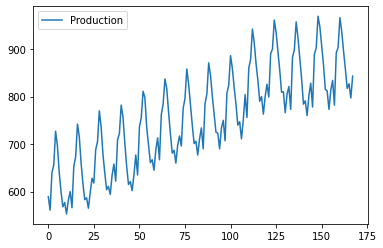

In [59]:
# Plot dataset

dataset_train.plot()
plt.show()

In [60]:
# Convert time column values to date time format
dataset_train['Time'] = pd.to_datetime(dataset_train['Time'])
dataset_train.head()

,Time,Production
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [61]:
# Obtain training set for analysis
X_new = dataset_train.iloc[:,1:2].values
X_new[0:5]

array([[589.],
       [561.],
       [640.],
       [656.],
       [727.]])

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
train_set, test_set, _, _ = train_test_split(X_new, X_new, test_size = 0.08, random_state = 0)

In [63]:
# Feature scaling by normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)
test_set_sc = sc.transform(test_set)

In [64]:
# print train set
train_set_sc[0:5]

array([[0.34375   ],
       [0.16346154],
       [0.53365385],
       [0.37019231],
       [0.68269231]])

In [65]:
# print test set
train_set_sc[0:5]

array([[0.34375   ],
       [0.16346154],
       [0.53365385],
       [0.37019231],
       [0.68269231]])

In [66]:
# Create data structure using history (Tx) and 1 output for training set
Tx = 10
X_train = []
y_train = []
m = len(train_set_sc)

for i in range(Tx, m):
    X_train.append(train_set_sc[i-Tx : i, 0])
    y_train.append(train_set_sc[i,0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)

In [67]:
# Examine data structure for training set
print(X_train.shape)
print(y_train.shape)
X_train

(144, 10)
(144,)


array([[0.34375   , 0.16346154, 0.53365385, ..., 0.37980769, 0.85336538,
        0.58653846],
       [0.16346154, 0.53365385, 0.37019231, ..., 0.85336538, 0.58653846,
        0.34615385],
       [0.53365385, 0.37019231, 0.68269231, ..., 0.58653846, 0.34615385,
        0.62980769],
       ...,
       [0.40625   , 0.22115385, 0.55528846, ..., 0.08173077, 0.05769231,
        0.55288462],
       [0.22115385, 0.55528846, 0.76442308, ..., 0.05769231, 0.55288462,
        0.40625   ],
       [0.55528846, 0.76442308, 0.25721154, ..., 0.55288462, 0.40625   ,
        0.59375   ]])

In [68]:
# Create data structure using history (Tx) and 1 output for test set
X_test = []
y_test = []
m_test = len(test_set_sc)

for i in range(Tx, m_test):
    X_test.append(train_set_sc[i-Tx : i, 0])
    y_test.append(train_set_sc[i,0])
    
X_test, y_test = np.array(X_test) , np.array(y_test)

In [69]:
# Examine data structure for test set
print(X_test.shape)
print(y_test.shape)
X_test

(4, 10)
(4,)


array([[0.34375   , 0.16346154, 0.53365385, 0.37019231, 0.68269231,
        0.47355769, 0.47596154, 0.37980769, 0.85336538, 0.58653846],
       [0.16346154, 0.53365385, 0.37019231, 0.68269231, 0.47355769,
        0.47596154, 0.37980769, 0.85336538, 0.58653846, 0.34615385],
       [0.53365385, 0.37019231, 0.68269231, 0.47355769, 0.47596154,
        0.37980769, 0.85336538, 0.58653846, 0.34615385, 0.62980769],
       [0.37019231, 0.68269231, 0.47355769, 0.47596154, 0.37980769,
        0.85336538, 0.58653846, 0.34615385, 0.62980769, 0.32451923]])

In [70]:
# Reshape to RNN Input shape including adding new indicators

X_train = np.reshape(X_train, newshape= (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, newshape= (X_test.shape[0], X_test.shape[1], 1))

## Part 2 - Building the RNN / LSTM / GRU

In [71]:
# Import the libraries from keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM, GRU
from keras.layers import BatchNormalization

In [72]:
# Initalize the GRU

gru = Sequential()

In [73]:
# Add the first layer and dropout regularization
gru.add(GRU(units = 50, return_sequences= True, input_shape= (X_train.shape[1],1))) # the 1 in input-shape corresponds to no of indicators
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [74]:
# Add the Second layer and dropout regularization
gru.add(GRU(units = 50, return_sequences=True))
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [75]:
# Add the Third layer and dropout regularization
gru.add(GRU(units = 50, return_sequences=True))
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [76]:
# Add the Fourth layer and dropout regularization
gru.add(GRU(units = 50, return_sequences=False))
gru.add(BatchNormalization())
gru.add(Dropout((0.2)))

In [77]:
# Add the output layer
gru.add(Dense(units = 1))

In [78]:
# Compile the GRU
gru.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
gru.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 50)            7950      
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 50)            200       
_________________________________________________________________
dropout (Dropout)            (None, 10, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 10, 50)            15300     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 50)            200       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 10, 50)           

In [80]:
# Fitting the gru to the training set
gru.fit(X_train, y_train, epochs = 100, batch_size=16)

Epoch 1/100
9/9 [==============================] - 0s 11ms/step - loss: 0.4166
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 0.5454
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3996
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.5040
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.4604
Epoch 6/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3276
Epoch 7/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3022
Epoch 8/100
9/9 [==============================] - 0s 11ms/step - loss: 0.4505
Epoch 9/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3291
Epoch 10/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3463
Epoch 11/100
9/9 [==============================] - 0s 13ms/step - loss: 0.3137
Epoch 12/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3174
Epoch 13/100
9/9 [==============================]

## Step 3: Making Predictions and visualizing the results